# 대선자료 시각화

In [1]:
# 모듈 불러오기
import pandas as pd

In [3]:
# Data 불러오기
election = pd.read_csv('../Data/election_2022.csv')
election.head()

,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정
0,서울특별시,종로구,129968,100629,46130,49172,3115
1,서울특별시,중구,111448,84998,38244,42906,2310
2,서울특별시,용산구,199077,152068,60063,85047,4374
3,서울특별시,성동구,252087,197240,84411,103880,5365
4,서울특별시,광진구,303582,235471,109922,113733,7072


In [14]:
# 기본 통계량 확인하기 : 갯수, 평균, 표준편차, 1~4사분위수 , 최대값 등등 
election.describe()

,선거인수,투표수,이재명,윤석열,심상정
count,248.000000,248.000000,248.000000,248.000000,248.000000
mean,176570.540323,136147.838710,64479.104839,65566.290323,3215.532258
std,141049.731983,108569.706317,56875.864428,56766.365763,2893.695797
min,8141.000000,6653.000000,1590.000000,2052.000000,109.000000
25%,47671.500000,39215.750000,17363.000000,18223.000000,709.000000
50%,154353.500000,114654.000000,48797.000000,50341.000000,2617.500000
75%,265099.250000,204189.250000,99830.750000,101949.750000,5041.000000
max,703896.000000,542027.000000,285227.000000,275155.000000,13249.000000


> 통계학적으로 이재명이 전체적으로 다 낮다. 특정 지역에서만 표를 많이 받음, 그냥 완패 임

In [8]:
# 컬럼명 확인하기
election.columns

Index(['광역시도', '시군구', '선거인수', '투표수', '이재명', '윤석열', '심상정'], dtype='object')

In [12]:
# demension 확인하기
election.shape # ( row , column )

(248, 7)

In [15]:
# 컬럼별 자료형 확인하기
election.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   광역시도    248 non-null    object
 1   시군구     248 non-null    object
 2   선거인수    248 non-null    int64 
 3   투표수     248 non-null    int64 
 4   이재명     248 non-null    int64 
 5   윤석열     248 non-null    int64 
 6   심상정     248 non-null    int64 
dtypes: int64(5), object(2)
memory usage: 13.7+ KB


In [22]:
# 전체 컬럼에서 NaN 확인
election.isnull().any()

광역시도    False
시군구     False
선거인수    False
투표수     False
이재명     False
윤석열     False
심상정     False
dtype: bool

In [27]:
# electionSum 컬럼 만들기 : 이재명 + 윤석열 + 심상정
election['electionSum'] = election.iloc[: , 4:7].sum(axis=1) # election.loc[: , '이재명':'심상정'].sum(axis=1)
election

,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum
0,서울특별시,종로구,129968,100629,46130,49172,3115,98417
1,서울특별시,중구,111448,84998,38244,42906,2310,83460
2,서울특별시,용산구,199077,152068,60063,85047,4374,149484
3,서울특별시,성동구,252087,197240,84411,103880,5365,193656
4,서울특별시,광진구,303582,235471,109922,113733,7072,230727
...,...,...,...,...,...,...,...,...
243,경상남도,산청군,31645,24913,7125,16607,464,24196
244,경상남도,거창군,53049,41399,11963,27254,895,40112
245,경상남도,합천군,39768,31270,6911,22742,511,30164
246,제주특별자치도,제주시,408552,296826,157695,122084,10007,289786


In [32]:
# electionRatio 컬럼 만들기 : electionSum / 투표수 * 100 , 반올림 소수점 2자리
election['electionRatio'] = round(election['electionSum'] / election['투표수'] * 100  , 2)
election.head()

,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum,electionRatio
0,서울특별시,종로구,129968,100629,46130,49172,3115,98417,97.80
1,서울특별시,중구,111448,84998,38244,42906,2310,83460,98.19
2,서울특별시,용산구,199077,152068,60063,85047,4374,149484,98.30
3,서울특별시,성동구,252087,197240,84411,103880,5365,193656,98.18
4,서울특별시,광진구,303582,235471,109922,113733,7072,230727,97.99


In [33]:
# csv 로 저장하기
election.to_csv('../Data/election_2022_1st.csv' , index=False)

---
# 광역시별 투표율을 Pie Chart로 표현하기
투표수 컬럼만 사용

In [58]:
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [59]:
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
    
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

> \

In [119]:
# 그룹핑
elec_group = election.groupby('광역시도').sum()
# 투표수를 내림차순으로 정렬
elec_group = elec_group.투표수.sort_values(ascending = False)
type(elec_group)

pandas.core.series.Series

> 피벗테이블 쓰는게 더 좋다@!

In [122]:
# 피벗테이블
elec_pivot = election.pivot_table(index = ['광역시도'], values = ['투표수'] , aggfunc = sum )
# 투표수를 내림차순으로 정렬
elec_pivot = elec_pivot.sort_values(by= '투표수' , ascending= False)
type(elec_pivot)

pandas.core.frame.DataFrame

In [63]:
plt.style.use('default')
plt.rcParams['font.family'] = 'AppleGothic' # 한글 폰트 깨짐 해결

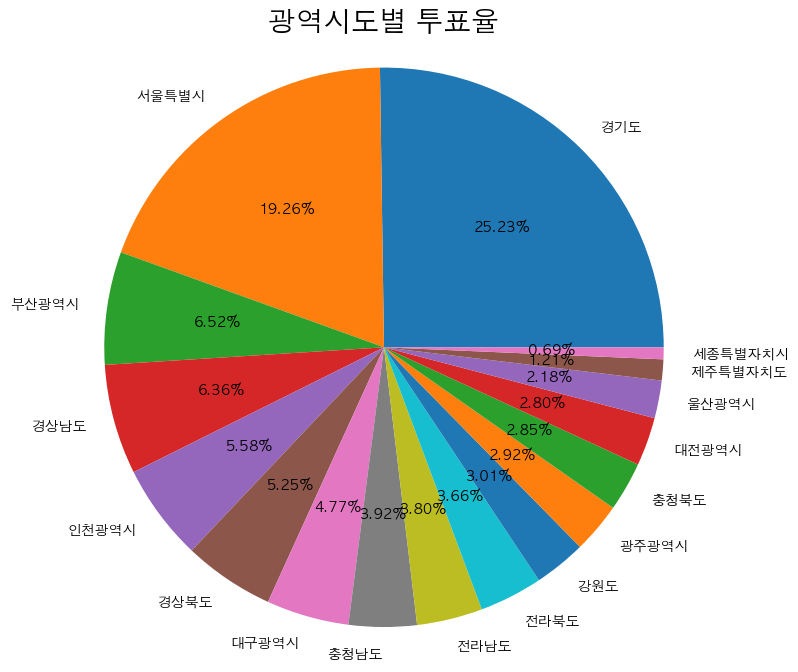

In [112]:
# 파이차트 그리기 # Series
elec_group.plot(
    kind = 'pie',
    figsize = (9,8),
    autopct = '%.2f%%', # autopercent , 뒤에 %% 를 붙여줘야 그래프에 % 기호가 표시된다. 
    startangle = 0, # 시작 각도
)

plt.title('광역시도별 투표율' , size = 20)
plt.axis('equal') # 약간 찌그러지게 나오는 파이차트를 원으로 만드는 옵션
plt.ylabel('') # ylabel 없앰
plt.show()


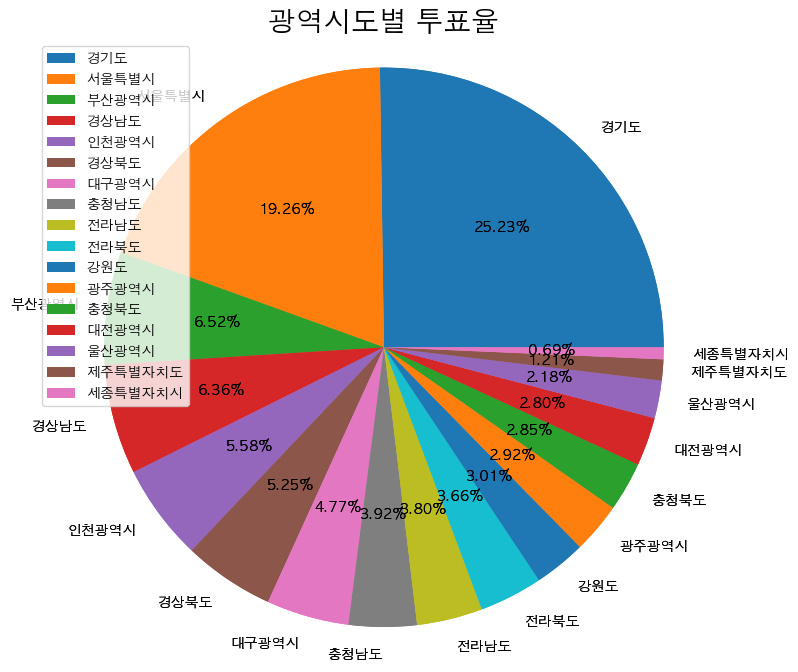

In [124]:
# 파이차트 그리기 # DataFrame

elec_pivot.plot(
    kind = 'pie',
    figsize = (9,8),
    autopct = '%.2f%%', # autopercent , 뒤에 %% 를 붙여줘야 그래프에 % 기호가 표시된다. 
    startangle = 0, # 시작 각도
    legend = True, # 기본으로 뜨더라
    # y = '투표수', # DataFrame으로 pie그리려면 써야함 (둘 중 하나)
    subplots = True , # DataFrame으로 pie그리려면 써야함 (둘 중 하나)
)

# elec_pivot.투표수.plot(
#     kind = 'pie',
#     figsize = (9,8),
#     autopct = '%.2f%%', # autopercent , 뒤에 %% 를 붙여줘야 그래프에 % 기호가 표시된다. 
#     startangle = 0, # 시작 각도
# )

plt.title('광역시도별 투표율' , size = 20)
plt.axis('equal') # 약간 찌그러지게 나오는 파이차트를 원으로 만드는 옵션
plt.ylabel('') # ylabel 없앰
plt.show()


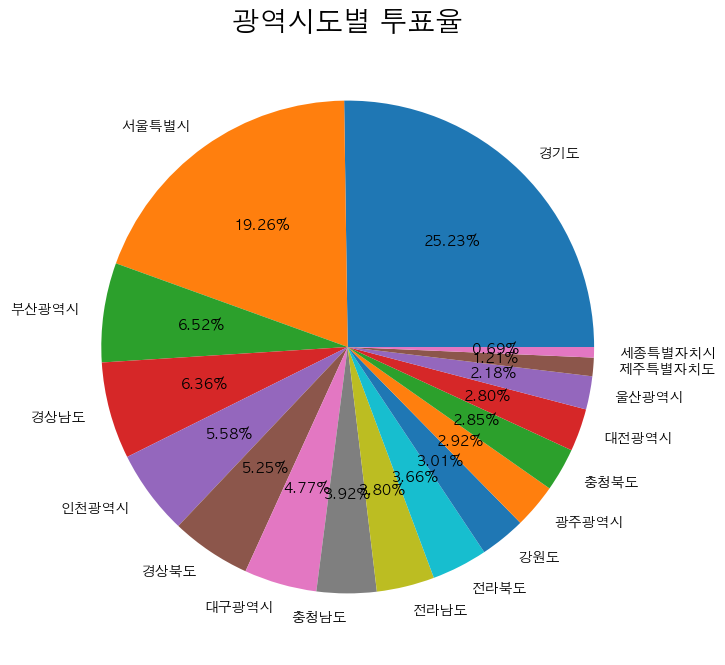

In [132]:
# 강사님 풀이
data = elec_pivot.투표수
categories = list(elec_pivot.index)

plt.rcParams['figure.figsize'] = (8,8)
plt.rcParams['font.size'] = 10

plt.pie(
    data,
    labels=categories,
    autopct="%.2f%%",
)
plt.title('광역시도별 투표율' , size = 20)
plt.show()

### 윤석열 후보의 광역시도별 득표율 

In [160]:
# 피벗테이블
yoon_pivot = election.pivot_table(index = ['광역시도'], values = ['윤석열'] , aggfunc = sum )
# # 투표수를 내림차순으로 정렬
yoon_pivot = yoon_pivot.sort_values(by= '윤석열' , ascending= False)
yoon_pivot

,윤석열
광역시도,
경기도,3859666
서울특별시,3255747
경상북도,1278922
부산광역시,1270072
경상남도,1237346
대구광역시,1199888
인천광역시,878560
충청남도,670283
강원도,544980


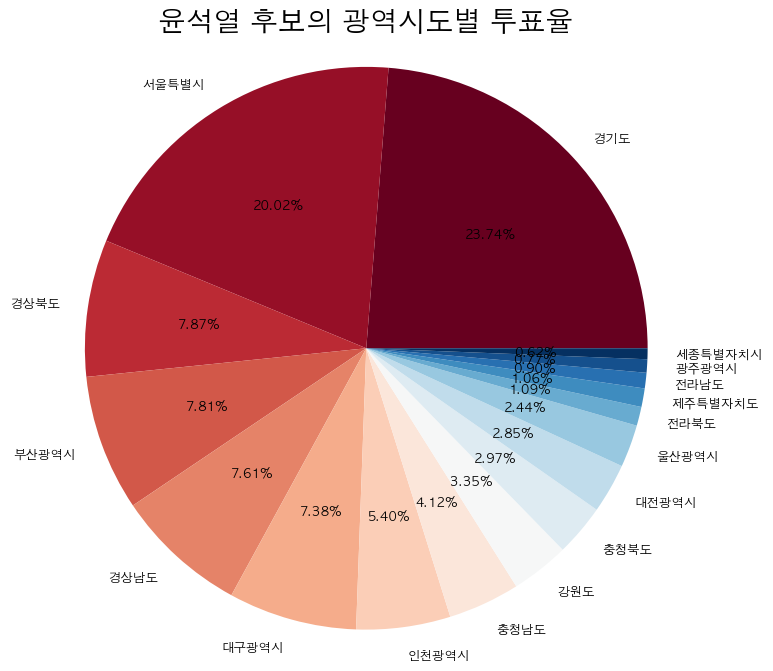

In [159]:
plt.rcParams['figure.figsize'] = (8,8)
plt.rcParams['font.size'] = 9

yoon_pivot.윤석열.plot(
    kind = 'pie',
    autopct="%.2f%%",
    cmap = 'RdBu'
)
plt.title('윤석열 후보의 광역시도별 투표율' , size = 20)
plt.ylabel('')
plt.axis('equal') 
plt.show()

### 윤석열 후보의 서울 득표 TOP 5

In [228]:
# ver 1
elec_seoul = election.loc[election['광역시도'] == '서울특별시']
elec_seoul = elec_seoul.set_index('시군구')
top5 = elec_seoul.sort_values(by = '윤석열' , ascending = False)[ :5]
top5 = top5.loc[:,'윤석열']
top5 # top5 뽑기

etc = elec_seoul.sort_values(by = '윤석열' , ascending = False)[ 5:].sum(axis=0)
etc = etc['윤석열'] # 나머지 뽑기

ind = list(top5.index)
ind.append('기타')
ind # 인덱스 만들기

top = list(top5.values)
top.append(etc)
top # 수치 만들기 

df = pd.Series(top , index = ind)
df

송파구     255166
강남구     235897
강서구     181510
서초구     179472
노원구     163340
기타     2240362
dtype: int64

In [250]:
# ver 2
elec_seoul = election.loc[election['광역시도'] == '서울특별시']
elec_seoul = elec_seoul.set_index('시군구')
elec_seoul = elec_seoul.sort_values(by = '윤석열' , ascending = False) # [ :5]
top5 = elec_seoul.loc[: , '윤석열'].head()
etc = elec_seoul.loc['강동구': , '윤석열'].sum(axis=0)
top5.loc['기타'] = etc
top5

시군구
송파구     255166
강남구     235897
강서구     181510
서초구     179472
노원구     163340
기타     2240362
Name: 윤석열, dtype: int64

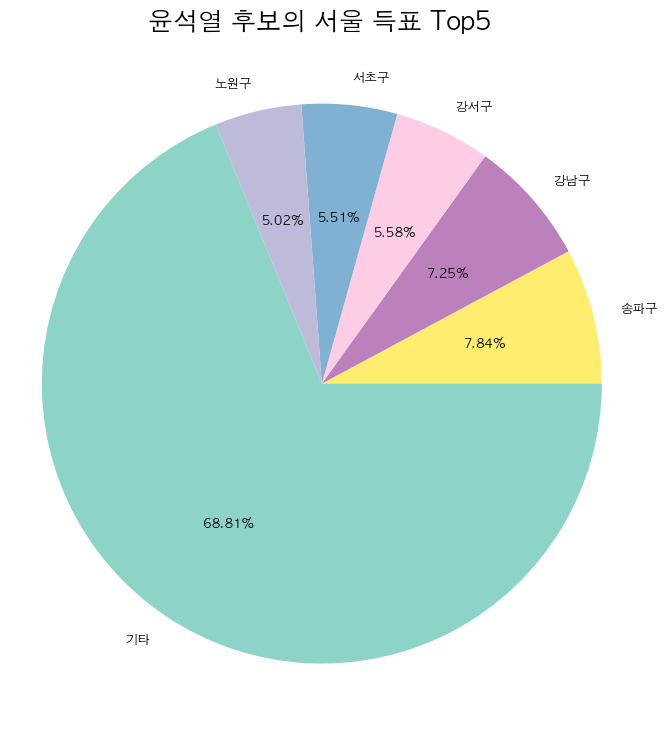

In [241]:
plt.rcParams['figure.figsize'] = (8,9)
plt.rcParams['font.size'] = 9

df.plot(
    kind = 'pie',
    autopct="%.2f%%",
    cmap = 'Set3_r'
)
plt.title('윤석열 후보의 서울 득표 Top5' , size = 18)
plt.ylabel('')
plt.axis('equal') 
plt.show()

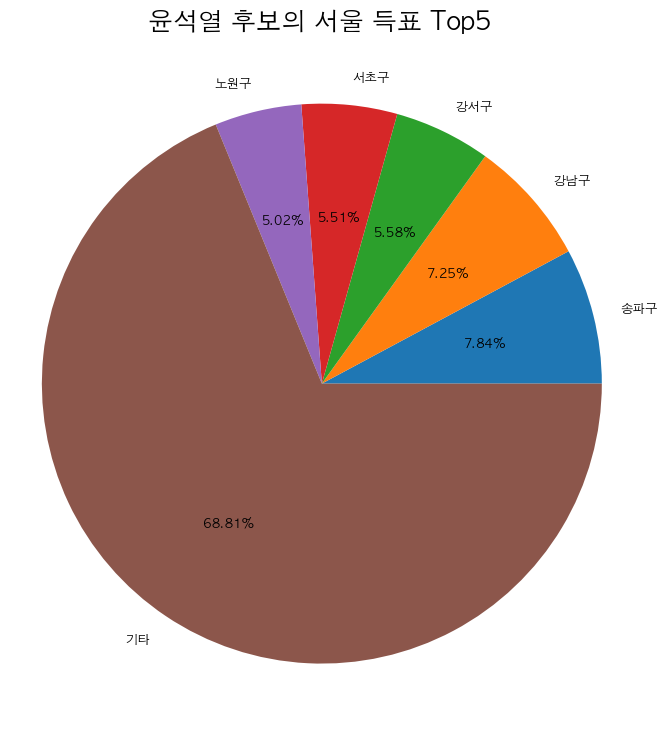

In [256]:
plt.rcParams['figure.figsize'] = (8,9)
plt.rcParams['font.size'] = 9

plt.pie(
    top5,
    labels= top5.index,
    autopct="%.2f%%",
)

plt.title('윤석열 후보의 서울 득표 Top5' , size = 18)
plt.ylabel('')
plt.axis('equal') 
plt.show()

---